## 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score


## 2. Loading the data

In [2]:
df=pd.read_excel(r"D:\Imarticus\Dataset downloads\Pumpkin seeds\Pumpkin_Seeds_Dataset\Pumpkin_Seeds_Dataset.xlsx")

In [3]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
df.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

In [5]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [6]:
df.shape

(2500, 13)

In [7]:
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Area
[56276 76631 71623 ... 69647 87994 80011] 

Perimeter
[ 888.242 1068.146 1082.987 ... 1210.314 1182.947 1159.933] 

Major_Axis_Length
[326.1485 417.1932 435.8328 ... 507.22   501.9065 462.8951] 

Minor_Axis_Length
[220.2388 234.2289 211.0457 ... 222.1872 204.7531 234.5597] 

Convex_Area
[56831 77280 72663 ... 88702 80902 85781] 

Equiv_Diameter
[267.6805 312.3614 301.9822 ... 297.7874 334.7199 319.1758] 

Eccentricity
[0.7376 0.8275 0.8749 ... 0.9358 0.8873 0.934 ] 

Solidity
[0.9902 0.9916 0.9857 0.985  0.9895 0.9929 0.9894 0.9886 0.9917 0.9898
 0.9888 0.9913 0.9908 0.9878 0.99   0.9934 0.9885 0.9872 0.9904 0.9923
 0.9906 0.9884 0.9915 0.9903 0.9882 0.9874 0.9881 0.9871 0.9905 0.9907
 0.9891 0.983  0.9912 0.976  0.9924 0.9911 0.9889 0.988  0.9875 0.992
 0.9939 0.9879 0.989  0.9896 0.9892 0.9877 0.9869 0.9862 0.9897 0.993
 0.9876 0.9829 0.9928 0.9921 0.9919 0.9937 0.9893 0.9901 0.9899 0.9802
 0.9852 0.9811 0.9756 0.9812 0.9805 0.9851 0.9861 0.9859 0.9542 0.9873
 0.9839 0.9887 0.98

In [8]:
for i in df.columns:
    print(i)
  

Area
Perimeter
Major_Axis_Length
Minor_Axis_Length
Convex_Area
Equiv_Diameter
Eccentricity
Solidity
Extent
Roundness
Aspect_Ration
Compactness
Class


## 3. Data cleaning

In [9]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [10]:
df.duplicated().sum()

0

## 4. Exploratory data analysis

In [11]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [12]:
df.Class.value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

### (i) Area v/s Class

In [13]:
pd.pivot_table

<function pandas.core.reshape.pivot.pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'str' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame'>

In [14]:
pivot_table=pd.pivot_table(data=df,values=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
                           'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 
                           'Extent','Roundness', 'Aspect_Ration', 'Compactness'],index='Class',aggfunc='mean',sort=False)
pivot_table

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Class,,,,,,,,,,,,
Çerçevelik,78423.154615,1089.522488,426.272615,234.776929,79286.488462,315.193332,0.830538,0.989080,0.707018,0.827499,1.822609,0.741163
Ürgüp Sivrisi,83079.542500,1174.431919,489.458501,216.064413,83914.813333,323.820202,0.893749,0.989938,0.678240,0.752570,2.279054,0.663991


<BarContainer object of 2 artists>

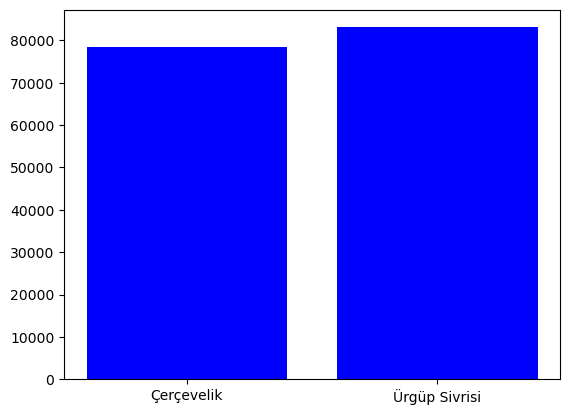

In [15]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[78423.154615,83079.542500],color='blue')

### (ii) Perimeter v/s Class

<BarContainer object of 2 artists>

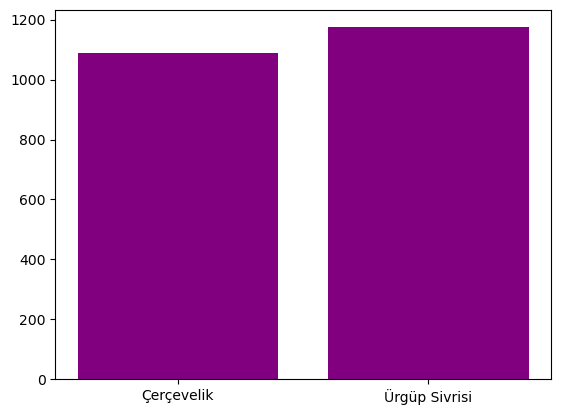

In [16]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[1089.522488,1174.431919],color='purple')

In [17]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

### (iii) Major_Axis_Length v/s Class

<BarContainer object of 2 artists>

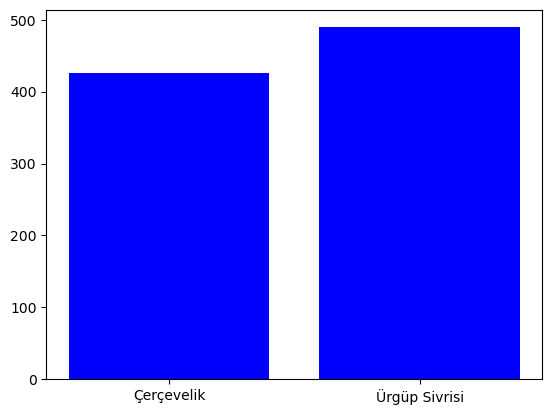

In [18]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[426.272615,489.458501], color='blue')

### (iv) Minor_Axis_Length v/s Class

<BarContainer object of 2 artists>

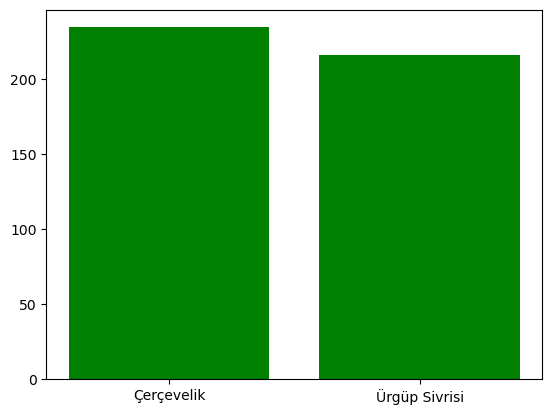

In [19]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[234.776929,216.064413], color='green')

### (v) Convex_Area v/s Class

<BarContainer object of 2 artists>

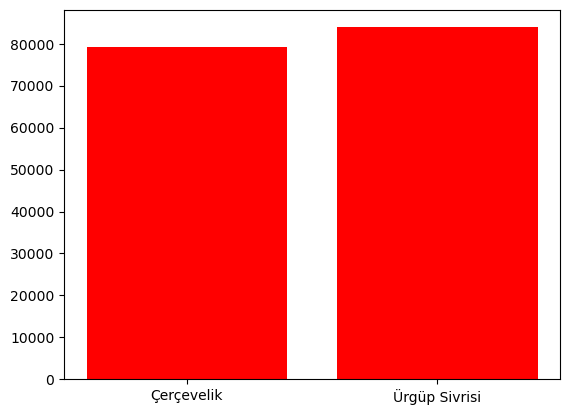

In [20]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[79286.488462,83914.813333], color='red')

### (vi) Equiv_Diameter v/s Class

<BarContainer object of 2 artists>

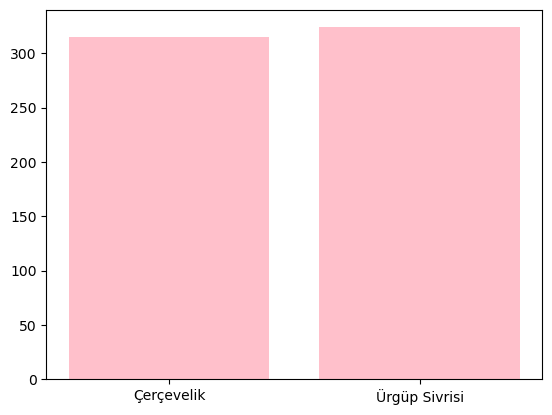

In [21]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[315.193332,323.820202], color='pink')

### (vii) Eccentricity

<BarContainer object of 2 artists>

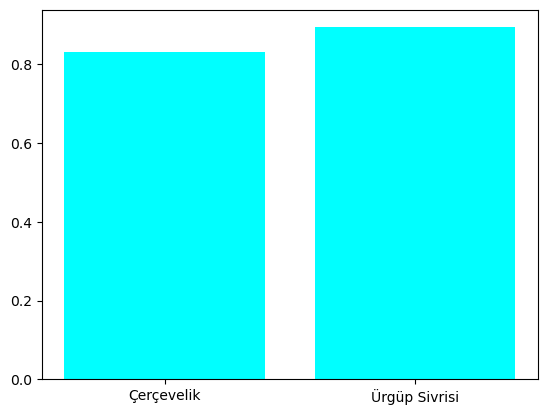

In [22]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[0.830538,0.893749], color='cyan')

### (viii) Solidity

<BarContainer object of 2 artists>

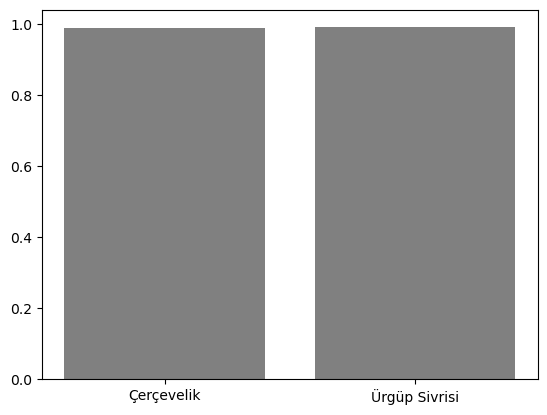

In [23]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[0.989080,0.989938], color='grey')

### (ix) Extent

<BarContainer object of 2 artists>

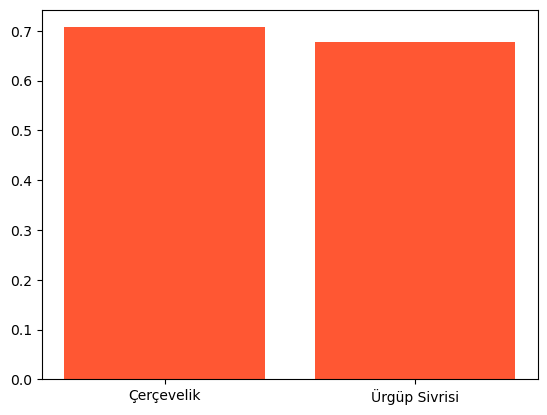

In [24]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[0.707018,0.678240], color='#FF5733')

### (x) Roundness

<BarContainer object of 2 artists>

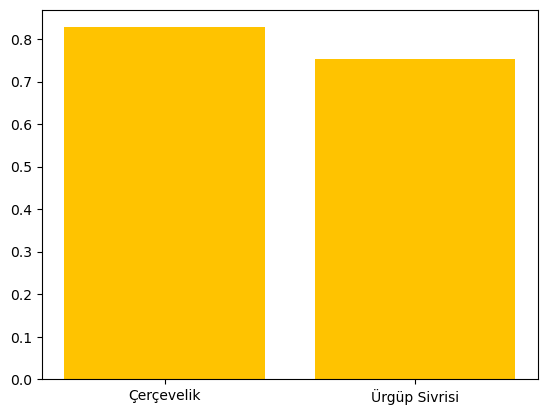

In [25]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[0.827499,0.752570], color='#FFC300')

In [26]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

### (xi) Aspect_Ration

<BarContainer object of 2 artists>

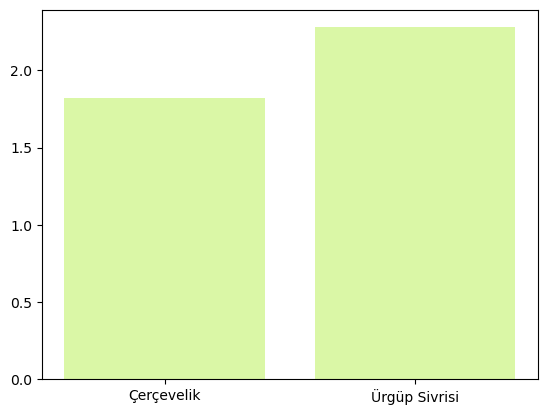

In [27]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[1.822609,2.279054], color='#DAF7A6')

### (xii) Compactness

<BarContainer object of 2 artists>

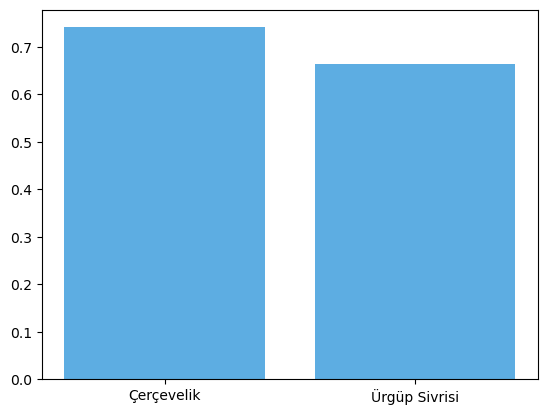

In [28]:
plt.bar(x=['Çerçevelik','Ürgüp Sivrisi'],height=[0.741163,0.663991], color='#5DADE2')

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_19452\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

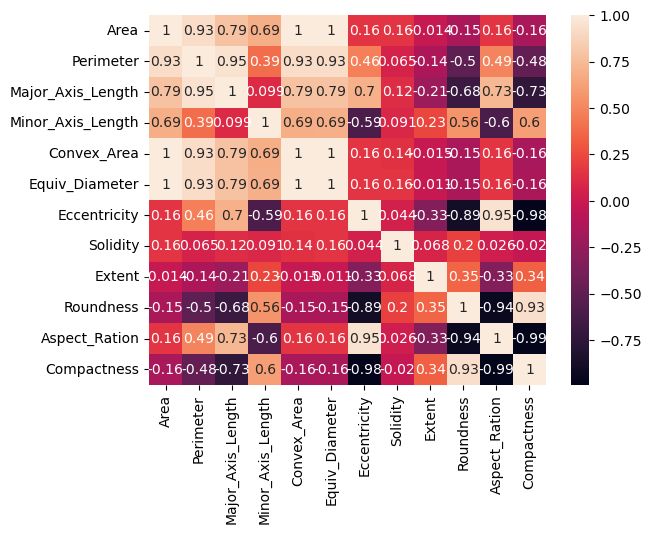

In [29]:
sns.heatmap(df.corr(),annot=True)

## 5. Test and train data

In [30]:
X=df.drop('Class',axis=1)

In [31]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


In [32]:
y=pd.get_dummies(df.Class,drop_first=True)

In [33]:
y

,Ürgüp Sivrisi
0,0
1,0
2,0
3,0
4,0
...,...
2495,1
2496,1
2497,1
2498,1


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [35]:
df.shape

(2500, 13)

In [36]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2000, 12) (500, 12) (2000, 1) (500, 1)


In [37]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Bhanu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
ytrain_pred = clf.predict(X_train)
ytest_pred = clf.predict(X_test)

In [39]:
y_test

,Ürgüp Sivrisi
1406,1
297,0
1276,0
2368,1
438,0
...,...
443,0
1735,1
674,0
2309,1


In [40]:
ytest_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

## 6. Model evaluation

In [41]:
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.88, Testing Score 0.86


In [42]:
confusion_matrix(y_train,ytrain_pred)

array([[953,  96],
       [139, 812]], dtype=int64)

In [44]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1049
           1       0.89      0.85      0.87       951

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [45]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       251
           1       0.87      0.85      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [46]:
df.shape

(2500, 13)

In [47]:
confusion_matrix(y_test,ytest_pred)

array([[218,  33],
       [ 37, 212]], dtype=int64)

In [48]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       251
           1       0.87      0.85      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

